In [2]:
# Introducción
# Este notebook contiene análisis de Clustering, Reglas de Asociación y Análisis de Componentes Principales
# sobre un dataset de películas. Se utilizarán diversas técnicas de preprocesamiento y análisis para extraer
# información relevante.

# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.decomposition import PCA
from factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import scale
import numpy as np
import vat
import random
import pyclustertend
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import sklearn.preprocessing
from sklearn.metrics import pairwise_distances


# Verificar que todo funciona bien
print("Librerías importadas correctamente")


Librerías importadas correctamente


In [3]:
# Cargar el dataset
file_path = "movies.csv"
df = pd.read_csv(file_path, delimiter=';', encoding='ISO-8859-1')

# Mostrar las primeras filas para exploración
df.head()


,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,9/12/1995,5.7,2077.0,2.0,2.0,1.0,25.0,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,15/10/1993,6.5,223.0,3.0,3.0,2.0,15.0,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,25/05/1977,8.2,16598.0,3.0,2.0,1.0,105.0,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,30/05/2003,7.8,15928.0,2.0,1.0,1.0,24.0,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,6/07/1994,8.5,22045.0,3.0,2.0,1.0,76.0,18,48


In [4]:
df.describe()


,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,249876.829300,1.855163e+07,5.673753e+07,100.268100,51.407835,6.483243,1342.888055,2.595538,3.170768,1.750100,2148.520208
std,257380.109004,3.662669e+07,1.495826e+08,27.777829,216.771736,0.984324,2564.584239,1.153534,2.539207,3.010566,37207.494312
min,5.000000,0.000000e+00,0.000000e+00,0.000000,4.258000,1.300000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12286.500000,0.000000e+00,0.000000e+00,90.000000,14.580500,5.900000,120.000000,2.000000,2.000000,1.000000,13.000000
50%,152558.000000,5.000000e+05,1.631245e+05,100.000000,21.912000,6.500000,415.000000,3.000000,3.000000,1.000000,21.000000
75%,452021.750000,2.000000e+07,4.479661e+07,113.000000,40.660750,7.200000,1316.000000,3.000000,4.000000,2.000000,36.000000
max,922260.000000,3.800000e+08,2.847246e+09,750.000000,11474.647000,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000


In [5]:
# Mostrar primeras filas para exploración inicial
df.head()


,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,9/12/1995,5.7,2077.0,2.0,2.0,1.0,25.0,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,15/10/1993,6.5,223.0,3.0,3.0,2.0,15.0,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,25/05/1977,8.2,16598.0,3.0,2.0,1.0,105.0,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,30/05/2003,7.8,15928.0,2.0,1.0,1.0,24.0,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,6/07/1994,8.5,22045.0,3.0,2.0,1.0,76.0,18,48


CLUSTERING

1.1. Haga el preprocesamiento del dataset, explique qué variables no aportan información a la generación de grupos y por qué. Describa con qué variables calculará los grupos.

In [6]:
# Selección de variables para clustering
columns_to_use = ['budget', 'revenue', 'popularity', 'voteAvg', 'voteCount',
                  'genresAmount', 'productionCoAmount', 'productionCountriesAmount',
                  'actorsAmount', 'castWomenAmount', 'castMenAmount']

# Filtrar solo las columnas que realmente están en el dataset
columns_to_use = [col for col in columns_to_use if col in df.columns]

# Reemplazar valores no numéricos o nulos en todas las columnas seleccionadas por 0
df[columns_to_use] = df[columns_to_use].apply(pd.to_numeric, errors='coerce').fillna(0)

# Eliminar filas con valores nulos solo en las columnas seleccionadas
data = df[columns_to_use]

# Variables que no se utilizarán y su justificación
unused_columns = ['id', 'genres','runtime', 'homePage', 'video', 'director', 'actors', 'originalTitle',
                  'title', 'originalLanguage', 'releaseDate', 'actorsPopularity']
df = df.drop(columns=unused_columns)

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Mostrar las primeras filas después de la transformación
df_scaled = pd.DataFrame(data_scaled, columns=columns_to_use)
df_scaled.head()


,budget,revenue,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,-0.397316,-0.350862,-0.140768,-0.786486,0.286515,-0.514980,-0.460548,-0.248969,-0.057064,-0.103754,-0.163043
1,0.066850,-0.298182,-0.192835,0.019495,-0.436550,0.351261,-0.066749,0.083255,-0.057332,-0.103933,-0.163043
2,-0.206189,4.804679,0.224325,1.732203,5.949747,0.351261,-0.460548,-0.248969,-0.054913,-0.103903,-0.162511
3,2.060032,5.907385,0.383203,1.329213,5.688445,-0.514980,-0.854348,-0.248969,-0.057090,-0.103903,-0.162953
4,0.995181,4.149421,0.033978,2.034446,8.074093,0.351261,-0.460548,-0.248969,-0.055692,-0.103709,-0.162651



1.2. Analice la tendencia al agrupamiento usando el estadístico de Hopkings y la VAT (Visual Assessment of cluster Tendency). Esta última hágala si es posible, teniendo en cuenta las dimensiones del conjunto de datos. Discuta sus resultados e impresiones.


Estadística de Hopkins: 0.0110


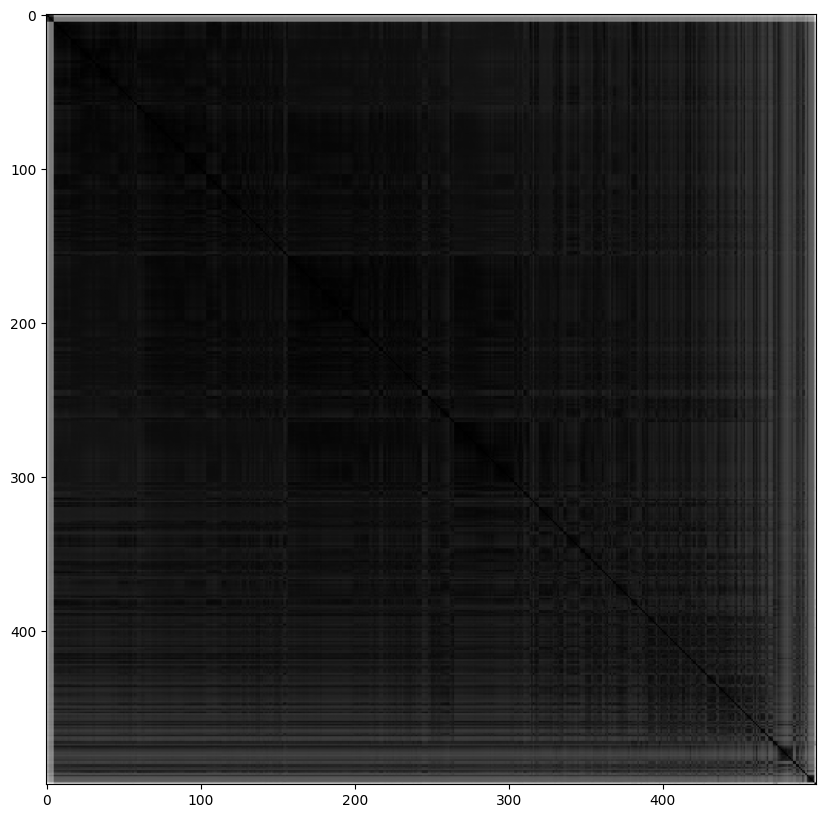

In [15]:
# Fijar la semilla para obtener resultados reproducibles
#random.seed(123)

# Escalar los datos para normalización
X_scale = sklearn.preprocessing.scale(data_scaled)

# Calcular la estadística de Hopkins
hopkins_stat = pyclustertend.hopkins(X_scale, len(X_scale))
print(f'Estadística de Hopkins: {hopkins_stat:.4f}')

# Aplicar VAT con una muestra de datos si el tamaño es grande
X_scale = StandardScaler().fit_transform(data)
if X_scale.shape[0] > 500:
    X_sampled = X_scale[random.sample(range(X_scale.shape[0]), 500), :]
else:
    X_sampled = X_scale
pyclustertend.vat(X_sampled)